# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

d58b659172e89f4a1fde4fa4e46fc061


## Generate Cities List

In [2]:
var = range(-90, 90)
print(list(var))


[-90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

In [4]:
cities

['talnakh',
 'barentsburg',
 'vaini',
 'bengkulu',
 'witu',
 'tasiilaq',
 'hamilton',
 'umzimvubu',
 'tsihombe',
 'fort nelson',
 'butaritari',
 'ikalamavony',
 'rikitea',
 'mataura',
 'busselton',
 'freeport',
 'sangar',
 'saskylakh',
 'nikolskoye',
 'husavik',
 'lima',
 'cascais',
 'panaba',
 'albany',
 'chihuahua',
 'portland',
 'kapaa',
 'ancud',
 'puerto ayora',
 'faya',
 'koumac',
 'kodiak',
 'lazaro cardenas',
 'punta arenas',
 'faanui',
 'sitka',
 'waingapu',
 'port alfred',
 'hobart',
 'bluff',
 'ushuaia',
 'kano',
 'fairbanks',
 'cape town',
 'east london',
 'turukhansk',
 'mar del plata',
 'nhulunbuy',
 'clearlake',
 'carnarvon',
 'severnyy-kospashskiy',
 'pisco',
 'vaitupu',
 'bethel',
 'warri',
 'new norfolk',
 'upernavik',
 'tuktoyaktuk',
 'mangrol',
 'pevek',
 'qaanaaq',
 'vancouver',
 'torbay',
 'jamestown',
 'riyadh',
 'ahipara',
 'srednekolymsk',
 'taolanaro',
 'susehri',
 'cardenas',
 'bilibino',
 'ambanja',
 'port elizabeth',
 'solnechnyy',
 'constitucion',
 'mikuni

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
city_list = cities
# city_list = []
# city_list.append(cities[0])
# city_list.append('Fake City')
data_list = []
print(city_list)
print('-----------------------------')
print ('Beginning Data Retrieval')    
print('-----------------------------')
for city in city_list:
    # pulls the data from the url
    x = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}")
    # pacing API requests
    time.sleep(1)
    # saving the json data
    json_data= x.json()
    
    # data is good
    # pprint(json_data['cod'])
    # data is good if cod = 200
    if json_data['cod'] == 200:
        # appending json_data to the data list
        processed = {}
        # "city","cloudiness","country","date","humidity","lat","lng","max temp","wind speed"
        data_list.append(processed)
        processed["city"] = json_data["name"]
        processed["cloudiness"] = json_data["clouds"]["all"]
        processed["country"] = json_data["sys"]["country"]
        processed["date"] = json_data["dt"]
        processed["humidity"] = json_data["main"]["humidity"]
        processed["lat"] = json_data["coord"]["lat"]
        processed["lng"] = json_data["coord"]["lon"]
        processed["max temp"] = json_data["main"]["temp_max"]
        processed["wind speed"] = json_data["wind"]["speed"]
        
        #         pprint(json_data)
        #         {'base': 'stations',
        #  'clouds': {'all': 90},
        #  'cod': 200,
        #  'coord': {'lat': 69.49, 'lon': 88.4},
        #  'dt': 1589747336,
        #  'id': 1490256,
        #  'main': {'feels_like': 271.85,
        #           'humidity': 100,
        #           'pressure': 1013,
        #           'temp': 276.15,
        #           'temp_max': 276.15,
        #           'temp_min': 276.15},
        #  'name': 'Talnakh',
        #  'sys': {'country': 'RU',
        #          'id': 8951,
        #          'sunrise': 1589739851,
        #          'sunset': 1589823703,
        #          'type': 1},
        #  'timezone': 25200,
        #  'visibility': 300,
        #  'weather': [{'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'}],
        #  'wind': {'deg': 190, 'speed': 4}}
        # Processing Record 1 of Set 1 | severo-kurilsk
        print(f"Processing Record {len(data_list)} of Set 1 | {city}")
    # data is bad
    else:
        print(f"City not found. Skipping {city}...")
    
    
    # {'cod': '404'
#     pprint(x.json())


print('-----------------------------')
print ('Data Retrieval Complete')    
print('-----------------------------')
pprint(data_list)
# Beginning Data Retrieval     
# -----------------------------
# Processing Record 1 of Set 1 | severo-kurilsk

# City not found. Skipping...

# -----------------------------
# Data Retrieval Complete      
# -----------------------------


['talnakh', 'barentsburg', 'vaini', 'bengkulu', 'witu', 'tasiilaq', 'hamilton', 'umzimvubu', 'tsihombe', 'fort nelson', 'butaritari', 'ikalamavony', 'rikitea', 'mataura', 'busselton', 'freeport', 'sangar', 'saskylakh', 'nikolskoye', 'husavik', 'lima', 'cascais', 'panaba', 'albany', 'chihuahua', 'portland', 'kapaa', 'ancud', 'puerto ayora', 'faya', 'koumac', 'kodiak', 'lazaro cardenas', 'punta arenas', 'faanui', 'sitka', 'waingapu', 'port alfred', 'hobart', 'bluff', 'ushuaia', 'kano', 'fairbanks', 'cape town', 'east london', 'turukhansk', 'mar del plata', 'nhulunbuy', 'clearlake', 'carnarvon', 'severnyy-kospashskiy', 'pisco', 'vaitupu', 'bethel', 'warri', 'new norfolk', 'upernavik', 'tuktoyaktuk', 'mangrol', 'pevek', 'qaanaaq', 'vancouver', 'torbay', 'jamestown', 'riyadh', 'ahipara', 'srednekolymsk', 'taolanaro', 'susehri', 'cardenas', 'bilibino', 'ambanja', 'port elizabeth', 'solnechnyy', 'constitucion', 'mikuni', 'codrington', 'tocopilla', 'lalin', 'necochea', 'yellowknife', 'stornowa

Processing Record 23 of Set 1 | portland
Processing Record 24 of Set 1 | kapaa
Processing Record 25 of Set 1 | ancud
Processing Record 26 of Set 1 | puerto ayora
Processing Record 27 of Set 1 | faya
Processing Record 28 of Set 1 | koumac
Processing Record 29 of Set 1 | kodiak
Processing Record 30 of Set 1 | lazaro cardenas
Processing Record 31 of Set 1 | punta arenas
Processing Record 32 of Set 1 | faanui
Processing Record 33 of Set 1 | sitka
Processing Record 34 of Set 1 | waingapu
Processing Record 35 of Set 1 | port alfred
Processing Record 36 of Set 1 | hobart
Processing Record 37 of Set 1 | bluff
Processing Record 38 of Set 1 | ushuaia
Processing Record 39 of Set 1 | kano
Processing Record 40 of Set 1 | fairbanks
Processing Record 41 of Set 1 | cape town
Processing Record 42 of Set 1 | east london
Processing Record 43 of Set 1 | turukhansk
Processing Record 44 of Set 1 | mar del plata
Processing Record 45 of Set 1 | nhulunbuy
Processing Record 46 of Set 1 | clearlake
Processing Re

Processing Record 204 of Set 1 | kavieng
Processing Record 205 of Set 1 | camopi
Processing Record 206 of Set 1 | manaus
Processing Record 207 of Set 1 | byron bay
Processing Record 208 of Set 1 | ayan
Processing Record 209 of Set 1 | shahreza
Processing Record 210 of Set 1 | beringovskiy
Processing Record 211 of Set 1 | paamiut
Processing Record 212 of Set 1 | fukue
Processing Record 213 of Set 1 | eirunepe
Processing Record 214 of Set 1 | ouadda
Processing Record 215 of Set 1 | hirara
Processing Record 216 of Set 1 | batagay-alyta
Processing Record 217 of Set 1 | agbor
City not found. Skipping ust-kamchatsk...
Processing Record 218 of Set 1 | asuncion ocotlan
City not found. Skipping chagda...
Processing Record 219 of Set 1 | leningradskiy
Processing Record 220 of Set 1 | chuy
Processing Record 221 of Set 1 | guamuchil
Processing Record 222 of Set 1 | esperance
Processing Record 223 of Set 1 | bundaberg
Processing Record 224 of Set 1 | katsuura
Processing Record 225 of Set 1 | kuusam

Processing Record 390 of Set 1 | devils lake
Processing Record 391 of Set 1 | tobol
Processing Record 392 of Set 1 | nyurba
Processing Record 393 of Set 1 | opuwo
Processing Record 394 of Set 1 | pendencias
City not found. Skipping grand river south east...
Processing Record 395 of Set 1 | alappuzha
Processing Record 396 of Set 1 | sao filipe
Processing Record 397 of Set 1 | marondera
Processing Record 398 of Set 1 | palu
Processing Record 399 of Set 1 | hami
Processing Record 400 of Set 1 | nabire
Processing Record 401 of Set 1 | kropotkin
Processing Record 402 of Set 1 | morrope
Processing Record 403 of Set 1 | singaraja
Processing Record 404 of Set 1 | conceicao do araguaia
Processing Record 405 of Set 1 | sosnovo-ozerskoye
Processing Record 406 of Set 1 | norman wells
Processing Record 407 of Set 1 | bambanglipuro
City not found. Skipping warqla...
City not found. Skipping hihifo...
Processing Record 408 of Set 1 | ranong
Processing Record 409 of Set 1 | chumphon
Processing Record 

  'country': 'CL',
  'date': 1589748817,
  'humidity': 46,
  'lat': -35.97,
  'lng': -72.32,
  'max temp': 295.12,
  'wind speed': 1.31},
 {'city': 'Cidreira',
  'cloudiness': 0,
  'country': 'BR',
  'date': 1589748818,
  'humidity': 67,
  'lat': -30.18,
  'lng': -50.21,
  'max temp': 292.71,
  'wind speed': 3.21},
 {'city': 'Hithadhoo',
  'cloudiness': 100,
  'country': 'MV',
  'date': 1589748819,
  'humidity': 78,
  'lat': -0.6,
  'lng': 73.08,
  'max temp': 301.85,
  'wind speed': 9.54},
 {'city': 'Geraldton',
  'cloudiness': 0,
  'country': 'AU',
  'date': 1589748820,
  'humidity': 87,
  'lat': -28.77,
  'lng': 114.6,
  'max temp': 285.15,
  'wind speed': 5.1},
 {'city': 'Narsaq',
  'cloudiness': 100,
  'country': 'GL',
  'date': 1589748821,
  'humidity': 23,
  'lat': 60.92,
  'lng': -46.05,
  'max temp': 283.15,
  'wind speed': 9.8},
 {'city': 'Flin Flon',
  'cloudiness': 75,
  'country': 'CA',
  'date': 1589748822,
  'humidity': 24,
  'lat': 54.77,
  'lng': -101.86,
  'max temp':

  'lng': -65.1,
  'max temp': 287.12,
  'wind speed': 2.91},
 {'city': 'Salalah',
  'cloudiness': 40,
  'country': 'OM',
  'date': 1589748936,
  'humidity': 79,
  'lat': 17.02,
  'lng': 54.09,
  'max temp': 303.15,
  'wind speed': 2.1},
 {'city': 'Kavieng',
  'cloudiness': 0,
  'country': 'PG',
  'date': 1589748937,
  'humidity': 79,
  'lat': -2.57,
  'lng': 150.8,
  'max temp': 301.89,
  'wind speed': 6.84},
 {'city': 'Camopi',
  'cloudiness': 100,
  'country': 'GF',
  'date': 1589748938,
  'humidity': 96,
  'lat': 3.17,
  'lng': -52.32,
  'max temp': 296.71,
  'wind speed': 2.3},
 {'city': 'Manaus',
  'cloudiness': 20,
  'country': 'BR',
  'date': 1589748689,
  'humidity': 74,
  'lat': -3.1,
  'lng': -60.02,
  'max temp': 303.15,
  'wind speed': 1},
 {'city': 'Byron Bay',
  'cloudiness': 75,
  'country': 'AU',
  'date': 1589748472,
  'humidity': 100,
  'lat': -28.65,
  'lng': 153.62,
  'max temp': 287.15,
  'wind speed': 2.1},
 {'city': 'Ayan',
  'cloudiness': 90,
  'country': 'RU',


 {'city': 'Severomuysk',
  'cloudiness': 47,
  'country': 'RU',
  'date': 1589749088,
  'humidity': 98,
  'lat': 56.15,
  'lng': 113.43,
  'max temp': 268.3,
  'wind speed': 1.7},
 {'city': 'Cabras',
  'cloudiness': 39,
  'country': 'IT',
  'date': 1589749089,
  'humidity': 75,
  'lat': 39.93,
  'lng': 8.53,
  'max temp': 287.04,
  'wind speed': 1.34},
 {'city': 'Malokaterynivka',
  'cloudiness': 100,
  'country': 'UA',
  'date': 1589749090,
  'humidity': 97,
  'lat': 47.65,
  'lng': 35.25,
  'max temp': 284.26,
  'wind speed': 2.58},
 {'city': 'Elizabeth City',
  'cloudiness': 1,
  'country': 'US',
  'date': 1589748981,
  'humidity': 65,
  'lat': 36.29,
  'lng': -76.25,
  'max temp': 299.26,
  'wind speed': 6.2},
 {'city': 'Vao',
  'cloudiness': 100,
  'country': 'NC',
  'date': 1589749093,
  'humidity': 68,
  'lat': -22.67,
  'lng': 167.48,
  'max temp': 294.97,
  'wind speed': 6.4},
 {'city': 'Kumylzhenskaya',
  'cloudiness': 100,
  'country': 'RU',
  'date': 1589749094,
  'humidity

 {'city': 'Pendências',
  'cloudiness': 33,
  'country': 'BR',
  'date': 1589749150,
  'humidity': 86,
  'lat': -5.26,
  'lng': -36.72,
  'max temp': 298.81,
  'wind speed': 3.22},
 {'city': 'Alappuzha',
  'cloudiness': 100,
  'country': 'IN',
  'date': 1589749152,
  'humidity': 83,
  'lat': 9.49,
  'lng': 76.33,
  'max temp': 300.87,
  'wind speed': 8.97},
 {'city': 'São Filipe',
  'cloudiness': 72,
  'country': 'CV',
  'date': 1589749153,
  'humidity': 79,
  'lat': 14.9,
  'lng': -24.5,
  'max temp': 295.78,
  'wind speed': 5.17},
 {'city': 'Marondera',
  'cloudiness': 1,
  'country': 'ZW',
  'date': 1589749154,
  'humidity': 99,
  'lat': -18.19,
  'lng': 31.55,
  'max temp': 281.45,
  'wind speed': 1.92},
 {'city': 'Palu',
  'cloudiness': 100,
  'country': 'ID',
  'date': 1589749155,
  'humidity': 79,
  'lat': -0.89,
  'lng': 119.87,
  'max temp': 298.46,
  'wind speed': 1.3},
 {'city': 'Kumul',
  'cloudiness': 100,
  'country': 'CN',
  'date': 1589749156,
  'humidity': 16,
  'lat':

  'country': 'AU',
  'date': 1589749207,
  'humidity': 64,
  'lat': -34.73,
  'lng': 135.87,
  'max temp': 287.39,
  'wind speed': 5.15},
 {'city': 'Orizona',
  'cloudiness': 60,
  'country': 'BR',
  'date': 1589749208,
  'humidity': 80,
  'lat': -17.03,
  'lng': -48.3,
  'max temp': 293.97,
  'wind speed': 1.9},
 {'city': 'Gornopravdinsk',
  'cloudiness': 100,
  'country': 'RU',
  'date': 1589749209,
  'humidity': 87,
  'lat': 60.05,
  'lng': 69.9,
  'max temp': 285.48,
  'wind speed': 0.65},
 {'city': 'Nanortalik',
  'cloudiness': 100,
  'country': 'GL',
  'date': 1589749210,
  'humidity': 75,
  'lat': 60.14,
  'lng': -45.24,
  'max temp': 277.33,
  'wind speed': 5.22},
 {'city': 'Vestmanna',
  'cloudiness': 96,
  'country': 'FO',
  'date': 1589749211,
  'humidity': 80,
  'lat': 62.16,
  'lng': -7.17,
  'max temp': 279.15,
  'wind speed': 2.6},
 {'city': 'Mbulu',
  'cloudiness': 69,
  'country': 'TZ',
  'date': 1589749212,
  'humidity': 95,
  'lat': -3.85,
  'lng': 35.53,
  'max temp

  'wind speed': 6.51},
 {'city': 'Port Keats',
  'cloudiness': 41,
  'country': 'AU',
  'date': 1589749284,
  'humidity': 55,
  'lat': -14.25,
  'lng': 129.55,
  'max temp': 295.01,
  'wind speed': 3.88},
 {'city': 'Várzea da Palma',
  'cloudiness': 13,
  'country': 'BR',
  'date': 1589749286,
  'humidity': 82,
  'lat': -17.6,
  'lng': -44.73,
  'max temp': 295.09,
  'wind speed': 0.82},
 {'city': 'Kruisfontein',
  'cloudiness': 100,
  'country': 'ZA',
  'date': 1589749287,
  'humidity': 70,
  'lat': -34,
  'lng': 24.73,
  'max temp': 285.16,
  'wind speed': 2.32},
 {'city': 'Eyl',
  'cloudiness': 5,
  'country': 'SO',
  'date': 1589749288,
  'humidity': 71,
  'lat': 7.98,
  'lng': 49.82,
  'max temp': 302.34,
  'wind speed': 9.78},
 {'city': 'Chongwe',
  'cloudiness': 0,
  'country': 'ZM',
  'date': 1589749289,
  'humidity': 63,
  'lat': -15.33,
  'lng': 28.68,
  'max temp': 284.89,
  'wind speed': 1.88},
 {'city': 'Piney Green',
  'cloudiness': 90,
  'country': 'US',
  'date': 158974

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [26]:
data = data_list

df = pd.DataFrame(data)
df

,city,cloudiness,country,date,humidity,lat,lng,max temp,wind speed
0,Talnakh,90,RU,1589748661,100,69.49,88.40,276.15,4.00
1,Vaini,75,TO,1589748704,83,-21.20,-175.20,296.15,1.50
2,Bengkulu,99,ID,1589748705,93,-3.80,102.27,297.74,4.01
3,Witu,18,KE,1589748706,85,-2.39,40.44,298.19,6.31
4,Tasiilaq,99,GL,1589748707,51,65.61,-37.64,277.15,8.70
...,...,...,...,...,...,...,...,...,...
531,Te Anau,80,NZ,1589749311,84,-45.42,167.72,280.09,0.17
532,Black Diamond,85,US,1589749312,73,47.31,-122.00,293.15,1.14
533,Quime,58,BO,1589749313,34,-16.98,-67.22,288.46,2.87
534,Camacha,75,PT,1589749314,68,33.08,-16.33,291.15,4.60


City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [40]:
df.head()

,city,cloudiness,country,date,humidity,lat,lng,max temp,wind speed
0,Talnakh,90,RU,1589748661,100,69.49,88.40,276.15,4.00
1,Vaini,75,TO,1589748704,83,-21.20,-175.20,296.15,1.50
2,Bengkulu,99,ID,1589748705,93,-3.80,102.27,297.74,4.01
3,Witu,18,KE,1589748706,85,-2.39,40.44,298.19,6.31
4,Tasiilaq,99,GL,1589748707,51,65.61,-37.64,277.15,8.70


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Max Temperature (K)')

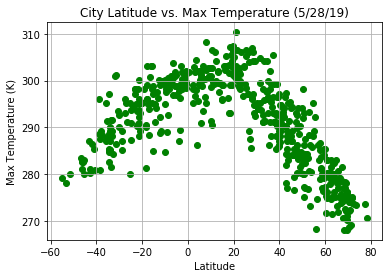

In [46]:
plt.scatter(x = 'lat', y = 'max temp', c = 'green', data = df)
plt.grid()
plt.title('City Latitude vs. Max Temperature (5/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')

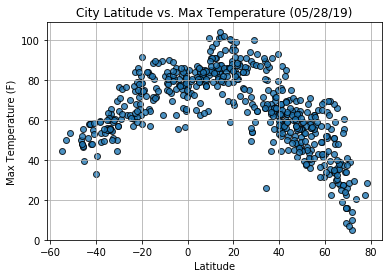

#### Latitude vs. Humidity Plot

In [47]:
df.head()

,city,cloudiness,country,date,humidity,lat,lng,max temp,wind speed
0,Talnakh,90,RU,1589748661,100,69.49,88.40,276.15,4.00
1,Vaini,75,TO,1589748704,83,-21.20,-175.20,296.15,1.50
2,Bengkulu,99,ID,1589748705,93,-3.80,102.27,297.74,4.01
3,Witu,18,KE,1589748706,85,-2.39,40.44,298.19,6.31
4,Tasiilaq,99,GL,1589748707,51,65.61,-37.64,277.15,8.70


Text(0, 0.5, 'Humidity (%)')

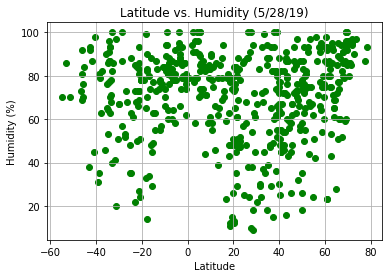

In [51]:
plt.scatter(x= 'lat', y='humidity', c= 'green', data= df )
plt.grid()
plt.title('Latitude vs. Humidity (5/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

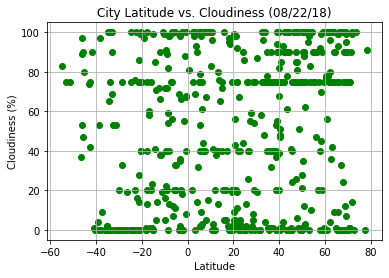

In [52]:
plt.scatter(x= 'lat', y='cloudiness', c= 'green', data=df)
plt.grid()
plt.title('City Latitude vs. Cloudiness (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

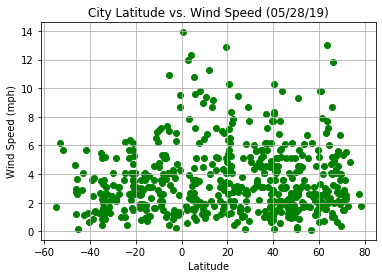

In [53]:
plt.scatter(x= 'lat', y='wind speed', c= 'green', data=df)
plt.grid()
plt.title('City Latitude vs. Wind Speed (05/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


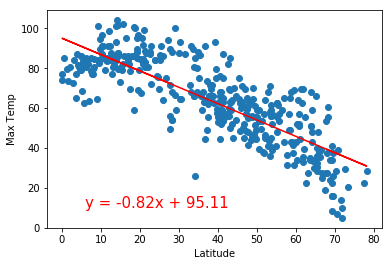

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


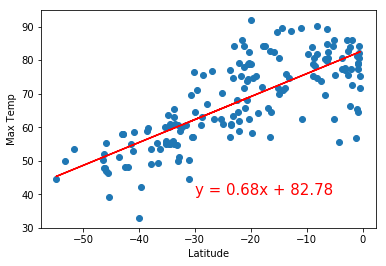

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


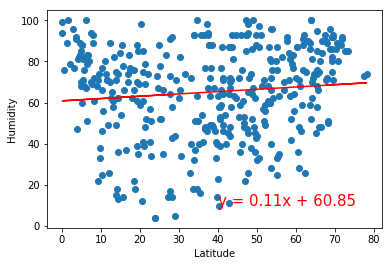

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


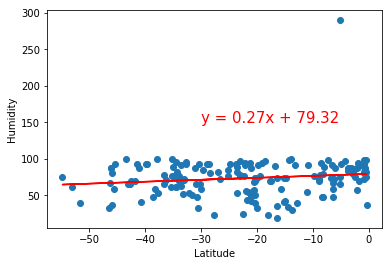

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


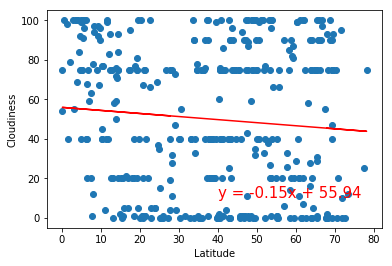

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


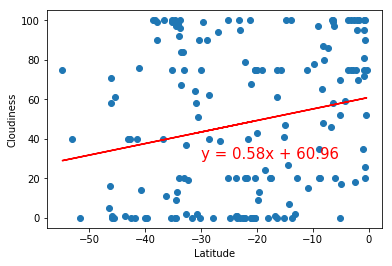

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


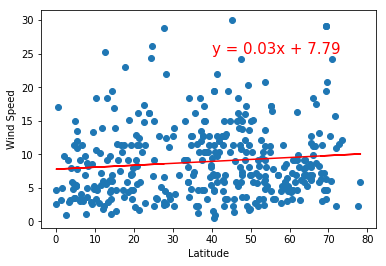

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


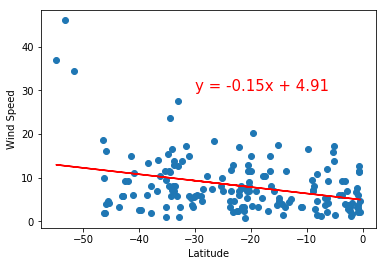